In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


In [3]:
file_path = r"C:\Users\youse\Desktop\Adidas sales\archive (4)\Sales Data.csv"
df = pd.read_csv(file_path)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [20]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
feature_names = ['Month', 'Product','City','Hour']
X = df[feature_names]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features Matrix (X) shape:", X.shape)
print("Target Vector (y) shape:", y.shape)


Features Matrix (X) shape: (185950, 4)
Target Vector (y) shape: (185950,)


In [21]:
print("\nFirst few rows of Features Matrix (X):\n", X.head())
print("\nFirst few rows of Target Vector (y):\n", y.head())


First few rows of Features Matrix (X):
    Month               Product            City  Hour
0     12    Macbook Pro Laptop   New York City     0
1     12    LG Washing Machine   New York City     7
2     12  USB-C Charging Cable   New York City    18
3     12      27in FHD Monitor   San Francisco    15
4     12  USB-C Charging Cable         Atlanta    12

First few rows of Target Vector (y):
 0    1700.00
1     600.00
2      11.95
3     149.99
4      11.95
Name: Sales, dtype: float64


In [22]:
df.shape

(185950, 10)

In [40]:
# Create a DecisionTreeRegressor
regressor =DecisionTreeClassifier(random_state=42)
 
# Train the model on the training set
regressor.fit(X_train, y_train)

# Predictions
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Evaluate the model using mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"\nMean Squared Error on Training Set: {mse_train}")
print(f"Mean Squared Error on Testing Set: {mse_test}")


Mean Squared Error on Training Set: 139.71770728070612
Mean Squared Error on Testing Set: 229.02376493050087


In [42]:
# Test the model on the testing set and evaluate the performance
score = regressor.score(X_test, y_test)
print(f"R-squared Score on Testing Set: {score}")

R-squared Score on Testing Set: 0.9979424407563512


In [48]:
# Predictions on the testing set 
predictions = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate the variance of the target variable
variance = np.var(y_test)

#if the Mean Squared Error (MSE) is lower than the variance of the target variable, it can be interpreted as a positive sign for your regression model.
# Compare MSE to the variance
print(f'Mean Squared Error: {mse}')
print(f'Variance of the Target Variable: {variance}')

# Assess the relationship
if mse < variance:
    print("The DecisionTreeRegressor is providing reasonable predictions.")
else:
    print("The DecisionTreeRegressor may not be capturing important patterns in the data.")

Mean Squared Error: 229.02376493050087
Variance of the Target Variable: 111308.46688251806
The DecisionTreeRegressor is providing reasonable predictions.


In [51]:
# Check the scale of the target variable
target_range = np.max(y) - np.min(y)
print(f'Range of Target Variable: {target_range}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate Mean Percentage Error
percentage_error = np.mean(np.abs(predictions - y_test) / y_test) * 100
print(f'Mean Percentage Error: {percentage_error}%')

Range of Target Variable: 3397.01
Root Mean Squared Error: 15.133531145456466
Mean Percentage Error: 13.475817682035329%


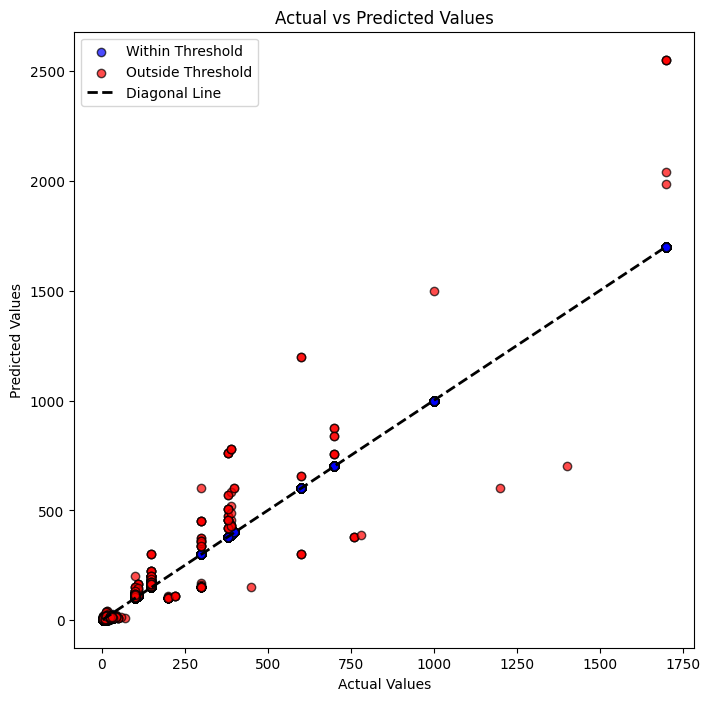

In [58]:
import matplotlib.pyplot as plt

# Assuming X_test, y_test, and your trained DecisionTreeRegressor (regressor) are available

# Make predictions on the testing set
predictions = regressor.predict(X_test)

# Set a threshold for highlighting points (you can adjust this based on your preference)
error_threshold = 5  # Adjust the threshold as needed

# Create a scatter plot
plt.figure(figsize=(8, 8))

# Scatter plot for points within the threshold
plt.scatter(y_test[(y_test - predictions).abs() <= error_threshold], 
            predictions[(y_test - predictions).abs() <= error_threshold],
            c='blue', edgecolors='k', alpha=0.7, label='Within Threshold')

# Scatter plot for points outside the threshold
plt.scatter(y_test[(y_test - predictions).abs() > error_threshold], 
            predictions[(y_test - predictions).abs() > error_threshold],
            c='red', edgecolors='k', alpha=0.7, label='Outside Threshold')

# Diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Diagonal Line')

# Set labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


Quantile-based Threshold: 6.636116161616134


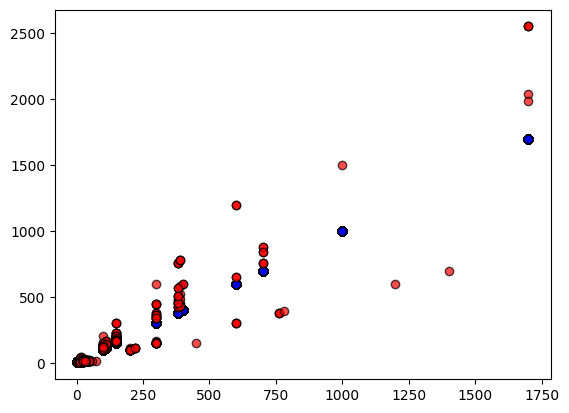

In [59]:
# Analyze the quantiles of residuals
residuals = (y_test - predictions).abs()
quantile_threshold = residuals.quantile(0.95)  # Adjust the quantile as needed
print(f"Quantile-based Threshold: {quantile_threshold}")

# Use the quantile-based threshold in the scatter plot
plt.scatter(y_test[residuals <= quantile_threshold], 
            predictions[residuals <= quantile_threshold],
            c='blue', edgecolors='k', alpha=0.7, label='Within Threshold')

plt.scatter(y_test[residuals > quantile_threshold], 
            predictions[residuals > quantile_threshold],
            c='red', edgecolors='k', alpha=0.7, label='Outside Threshold')


Best Threshold (minimizing RMSE): 0.0


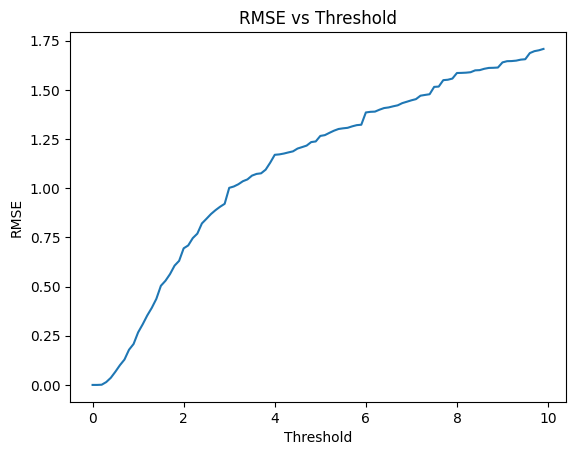

In [60]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_test, y_test, and your trained DecisionTreeRegressor (regressor) are available

# Make predictions on the testing set
predictions = regressor.predict(X_test)

# Calculate residuals
residuals = (y_test - predictions).abs()

# Create a range of potential threshold values
thresholds = np.arange(0, 10, 0.1)  # Adjust the range and step as needed

# Calculate RMSE for each threshold
rmse_values = [np.sqrt(mean_squared_error(y_test[residuals <= threshold], predictions[residuals <= threshold])) for threshold in thresholds]

# Find the threshold that minimizes RMSE
best_threshold = thresholds[np.argmin(rmse_values)]

# Print the best threshold
print(f"Best Threshold (minimizing RMSE): {best_threshold}")

# Plot RMSE values across different thresholds
plt.plot(thresholds, rmse_values)
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.title('RMSE vs Threshold')
plt.show()


If the best threshold for minimizing RMSE is found to be 0.0, it means that, in the context of your model and dataset, the optimal choice is not to set a threshold for identifying prediction errors. In other words, the model's predictions, as they are, result in the minimum RMSE without applying any additional filtering or categorization of predictions.

Interpretation:

Threshold of 0.0: This indicates that all predictions are considered within an acceptable range, and no specific threshold for identifying prediction errors is applied.

Minimizing RMSE: The goal of this analysis is to find the threshold that minimizes the Root Mean Squared Error (RMSE). RMSE is a measure of the average magnitude of prediction errors. In this case, the model's predictions themselves, without applying any threshold, result in the minimum RMSE.

No Filtering: The fact that the optimal threshold is 0.0 suggests that, based on the RMSE criterion, there is no need to filter or categorize predictions into different error levels.